In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571

import glob
import numpy as np

Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2

import seaborn as sns
import matplotlib.pyplot as plt

from mplh import cluster_help

fig_utils from mplh
here


In [4]:
os.chdir(ROOT_DIR)

## Files setup

#### Heteroplasmy minimum

In [5]:
het = 0.001
max_het= 0.8

In [6]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_0"
num_reads = 200
cellr="True"
in_prefix = f'2020_11_18'
pbmc_j = "PBMC_J"
pbmc_p = "PBMC_P"



pbmc_j_indir = join(indir, in_prefix, pbmc_j,mapq,f"cellr_{cellr}")
pbmc_p_indir = join(indir, in_prefix, pbmc_p,mapq,f"cellr_{cellr}")

# sc_coverage_pbmc_j_f = join(pbmc_j_indir,"scPileup_concat_200",pbmc_j+"_200_all.coverage.txt.gz")
# sc_coverage_pbmc_p_f = join(pbmc_p_indir,"scPileup_concat_200",pbmc_p + "_200_all.coverage.txt.gz")
coverage_pbmc_j_dir = join(indir, in_prefix, pbmc_j, mapq, f"{pbmc_j}_scPileup_{num_reads}")
coverage_pbmc_p_dir = join(indir, in_prefix, pbmc_p, mapq, f"{pbmc_p}_scPileup_{num_reads}")

concat_pbmc_j_dir = join(pbmc_j_indir,f"{pbmc_j}_{num_reads}")
concat_pbmc_p_dir = join(pbmc_p_indir,f"{pbmc_p}_{num_reads}")


mgatk_variants_pbmc_j = join(pbmc_j_indir,f'{pbmc_j}_{num_reads}',f'{pbmc_j}.af.tsv')
mgatk_variants_pbmc_p = join(pbmc_p_indir,f'{pbmc_p}_{num_reads}',f'{pbmc_p}.af.tsv')

In [42]:
sparse_pbmc_p = {}
sparse_pbmc_p['A'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.A.strands.txt.gz"), header=None)
sparse_pbmc_p['C'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.C.strands.txt.gz"), header=None)
sparse_pbmc_p['G'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.G.strands.txt.gz"), header=None)
sparse_pbmc_p['T'] = pd.read_csv(join(pbmc_p_indir, f"{pbmc_p}_{num_reads}", f"{pbmc_p}.T.strands.txt.gz"), header=None)
sparse_pbmc_p["A"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_p["C"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_p["G"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_p["T"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]

sparse_pbmc_j = {}
sparse_pbmc_j['A'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.A.strands.txt.gz"), header=None)
sparse_pbmc_j['C'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.C.strands.txt.gz"), header=None)
sparse_pbmc_j['G'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.G.strands.txt.gz"), header=None)
sparse_pbmc_j['T'] = pd.read_csv(join(pbmc_j_indir, f"{pbmc_j}_{num_reads}", f"{pbmc_j}.T.strands.txt.gz") ,header=None)
sparse_pbmc_j["A"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_j["C"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_j["G"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_pbmc_j["T"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]


In [8]:
pbmc_p_AF_by_cell = pd.read_csv(mgatk_variants_pbmc_p, sep='\t')
print("Number of variants from mgatk", pbmc_p_AF_by_cell.shape[0])

#pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[~(pbmc_p_AF_by_cell<het).all(axis=1)]
pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[(pbmc_p_AF_by_cell.mean(axis=1)>=het)]
pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.loc[(pbmc_p_AF_by_cell.mean(axis=1)<max_het)]
print(f"Number of variants after mean heteroplasmy of {het}: {pbmc_p_AF_by_cell.shape[0]}")
pbmc_p_AF_by_cell



Number of variants from mgatk 36788
Number of variants after mean heteroplasmy of 0.001: 999


,AAACGAAAGCTCGTTA-1,AAACGAAGTCCAGACC-1,AAACTGCCACTCCACT-1,AAAGGATAGGGAGTTC-1,AAATGCCCACTTATGG-1,AACAGTCCAGTCCTGG-1,AACAGTCTCATTCGGA-1,AACATCGGTCATTGGT-1,AACCAACTCGGGTCCA-1,AACCTTTGTGCTTACA-1,...,TTCTGTAAGGCACCTC-1,TTGAGTGTCGCTACCT-1,TTGCACCGTCAGGCTC-1,TTGCCCAGTAAAGGCC-1,TTGCCCATCGTTCAGA-1,TTGCTTATCCTAAGTG-1,TTTACGTCAGGATGTG-1,TTTACGTCAGTTCGGC-1,TTTGCGCCAACTCGAT-1,TTTGGTTAGTAGGAAG-1
14T>A,0.000000,0.000000,0.0,0.000000,0.00000,0.008333,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
31C>A,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.006031,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
62G>A,0.000000,0.007299,0.0,0.017751,0.00000,0.000000,0.002956,0.0,0.000000,0.0,...,0.0,0.005457,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
303C>A,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.031111,0.0,0.023636,0.0,0.000000,0.000000,0.000000,0.000000
318T>A,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.014859,0.0,...,0.0,0.021028,0.000000,0.0,0.016461,0.0,0.064151,0.000000,0.042607,0.008837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848A>T,0.000000,0.000000,0.0,0.000000,0.00738,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
16013A>T,0.000000,0.004808,0.0,0.000000,0.00000,0.000000,0.002717,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
16066A>T,0.005906,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.002786,0.0,0.000000,0.0,0.000000,0.006689,0.000000,0.000000
16150C>T,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.013559


cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

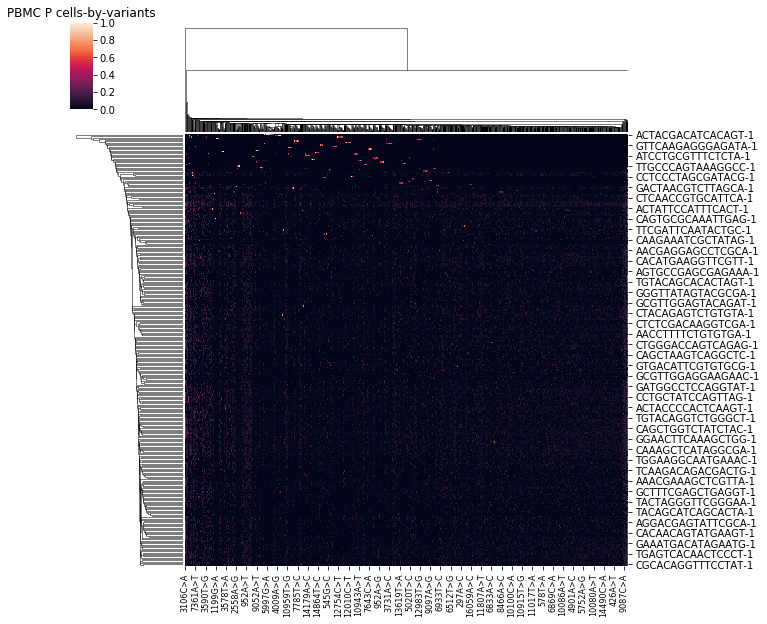

In [9]:
%matplotlib inline
cluster_help.plot_cluster(df=np.sqrt(pbmc_p_AF_by_cell.transpose()), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True, vmin=0, vmax=1,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

## Filter for AFs with greater than 0.01 mean heteroplasmy

### D. AF Binarized and inclusion of high occuring variants

cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

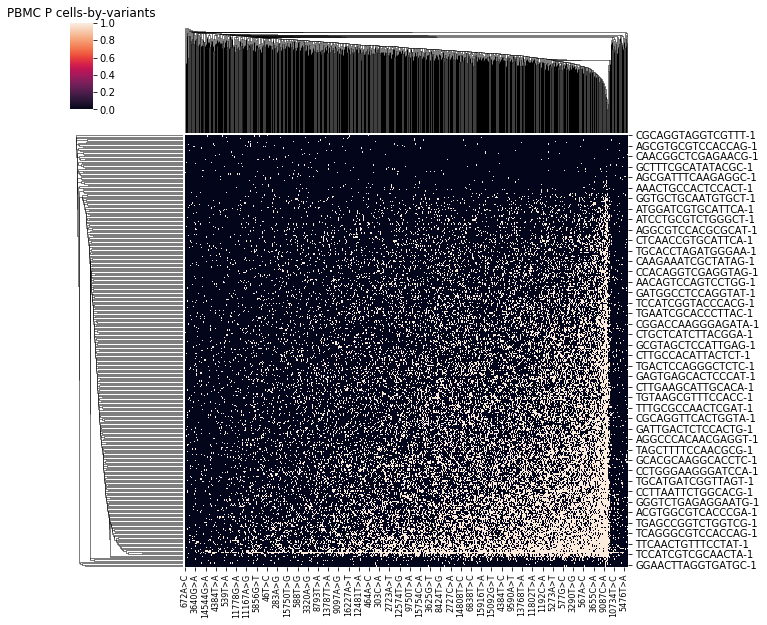

In [10]:
%matplotlib inline
bin_pbmc_p_AF_by_cell = pbmc_p_AF_by_cell.copy()
bin_pbmc_p_AF_by_cell[bin_pbmc_p_AF_by_cell>0] = 1
cluster_help.plot_cluster(df=bin_pbmc_p_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_p_variants.png"))

## PBMC J

Number of variants from mgatk 35540
Number of variants after mean heteroplasmy of 0.001: 647
cmap None
cmap None


Text(0.5, 1, 'PBMC P cells-by-variants')

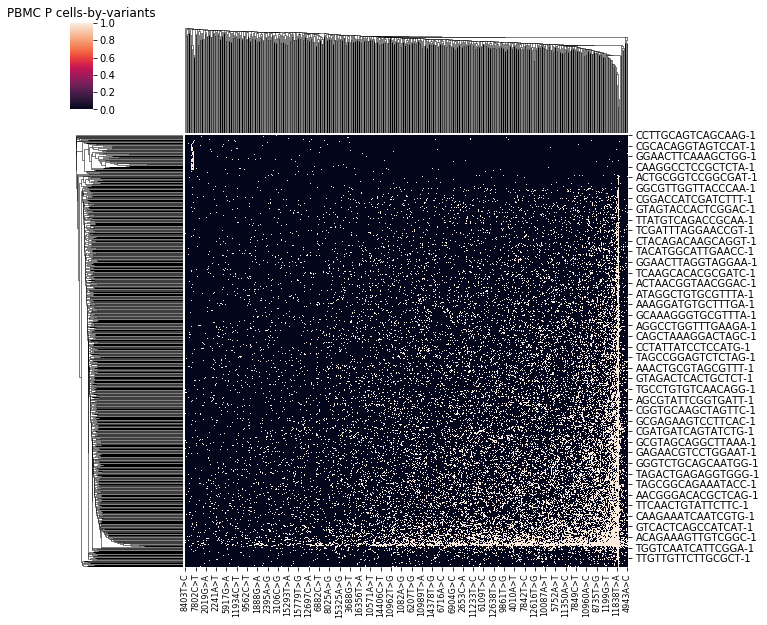

In [11]:
pbmc_j_AF_by_cell = pd.read_csv(mgatk_variants_pbmc_j, sep='\t')
print("Number of variants from mgatk", pbmc_j_AF_by_cell.shape[0])

#pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.loc[~(pbmc_j_AF_by_cell<het).all(axis=1)]
pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.loc[(pbmc_j_AF_by_cell.mean(axis=1)>=het)]
pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.loc[(pbmc_j_AF_by_cell.mean(axis=1)<max_het)]
print(f"Number of variants after mean heteroplasmy of {het}: {pbmc_j_AF_by_cell.shape[0]}")
pbmc_j_AF_by_cell



%matplotlib inline
cluster_help.plot_cluster(df=np.sqrt(pbmc_j_AF_by_cell.transpose()), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True, vmin=0, vmax=1,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

## Filter for AFs with greater than 0.01 mean heteroplasmy

### D. AF Binarized and inclusion of high occuring variants

%matplotlib inline
bin_pbmc_j_AF_by_cell = pbmc_j_AF_by_cell.copy()
bin_pbmc_j_AF_by_cell[bin_pbmc_j_AF_by_cell>0] = 1
cluster_help.plot_cluster(df=bin_pbmc_j_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("PBMC P cells-by-variants")
#plt.savefig(join(outdir,"pbmc_j_variants.png"))

In [12]:
pbmc_j_AF_by_cell.columns = pbmc_j_AF_by_cell.columns + "_pbmc_j"
pbmc_p_AF_by_cell.columns = pbmc_p_AF_by_cell.columns + "_pbmc_p"

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Overlap of called variants')

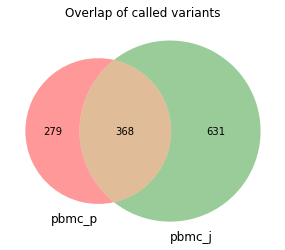

In [13]:

bin_pbmc_j_AF_by_cell.columns = bin_pbmc_j_AF_by_cell.columns + "_pbmc_j"
bin_pbmc_p_AF_by_cell.columns = bin_pbmc_p_AF_by_cell.columns + "_pbmc_p"
all_cells = pd.concat((bin_pbmc_j_AF_by_cell,bin_pbmc_p_AF_by_cell) ,axis=1)
all_cells_var_overlap = pd.concat((bin_pbmc_j_AF_by_cell,bin_pbmc_p_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values


%matplotlib inline
venn2([set(bin_pbmc_j_AF_by_cell.index.values),set(bin_pbmc_p_AF_by_cell.index.values)],set_labels=["pbmc_p","pbmc_j"])
plt.title("Overlap of called variants")


In [14]:
bin_pbmc_j_AF_by_cell

,AAACGAAGTGTCCCAG-1_pbmc_j,AAACTGCGTAGCGTTT-1_pbmc_j,AAAGATGAGTCCGGAA-1_pbmc_j,AAAGATGCAGGGCTTC-1_pbmc_j,AAAGATGCATGTGGGA-1_pbmc_j,AAAGGATAGCAGGAGG-1_pbmc_j,AAAGGATGTGAATACA-1_pbmc_j,AAAGGATGTGCTTTGA-1_pbmc_j,AAAGGATTCACCGCGA-1_pbmc_j,AAAGGGCCATTGAACC-1_pbmc_j,...,TTGTTCACATTATGGC-1_pbmc_j,TTGTTGTCATAGCCGC-1_pbmc_j,TTGTTGTGTGAGTTGG-1_pbmc_j,TTGTTGTTCTTGCGCT-1_pbmc_j,TTTACGTGTCACAGGA-1_pbmc_j,TTTACGTGTCCGCTTT-1_pbmc_j,TTTGAGGGTTTGTAGC-1_pbmc_j,TTTGCGCCAACTCGAT-1_pbmc_j,TTTGGCCCACCGAAAG-1_pbmc_j,TTTGTGTGTGCGTCCA-1_pbmc_j
62G>A,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
79G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
280C>A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0.0
318T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
456C>A,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16055C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
16150C>T,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
16374A>T,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
16419C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [15]:
cell_inds = {}
for ind, val in enumerate([bin_pbmc_j_AF_by_cell.columns.values,bin_pbmc_p_AF_by_cell.columns.values]):
    for j in val:
        cell_inds[j] = ind
pd.Series(cell_inds)

AAACGAAGTGTCCCAG-1_pbmc_j    0
AAACTGCGTAGCGTTT-1_pbmc_j    0
AAAGATGAGTCCGGAA-1_pbmc_j    0
AAAGATGCAGGGCTTC-1_pbmc_j    0
AAAGATGCATGTGGGA-1_pbmc_j    0
                            ..
TTGCTTATCCTAAGTG-1_pbmc_p    1
TTTACGTCAGGATGTG-1_pbmc_p    1
TTTACGTCAGTTCGGC-1_pbmc_p    1
TTTGCGCCAACTCGAT-1_pbmc_p    1
TTTGGTTAGTAGGAAG-1_pbmc_p    1
Length: 1065, dtype: int64

In [16]:
colors = {0:"J", 1:"P"}
cell_colors = pd.Series(cell_inds).map(colors)

cmap None


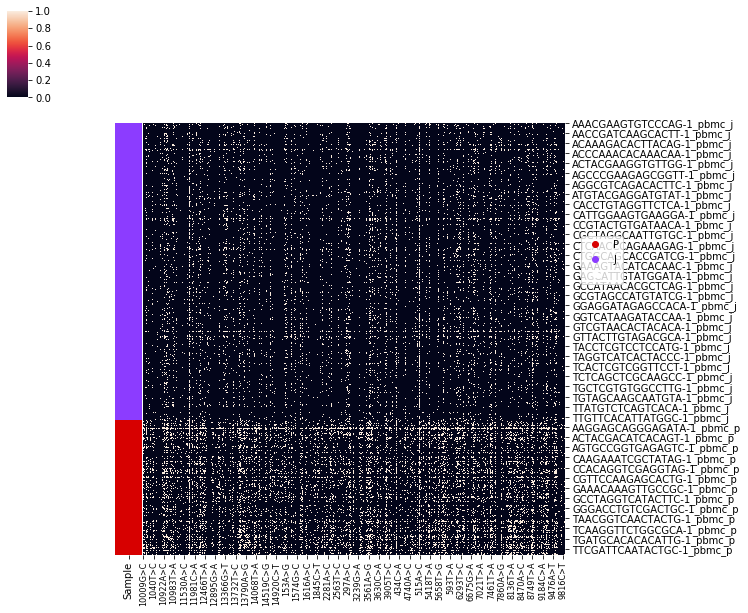

In [17]:
cluster_help.plot_cluster(df=all_cells.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

cmap None


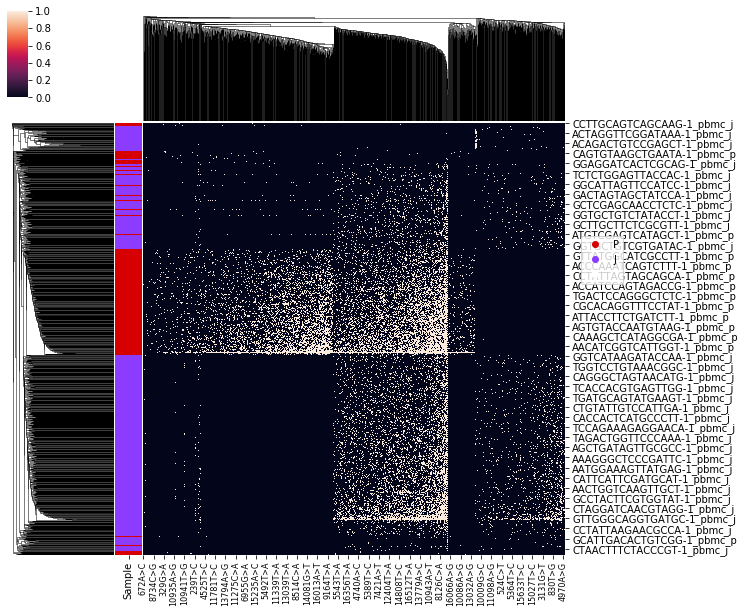

In [18]:
g = cluster_help.plot_cluster(df=all_cells.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=True, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

## Relate this to coverage

In [19]:
pbmc_j_depth = pd.read_csv(join(concat_pbmc_j_dir,"sc_coverage.csv"), index_col=0)
pbmc_j_depth.columns = np.arange(1, pbmc_j_depth.shape[1]+1)
pbmc_p_depth = pd.read_csv(join(concat_pbmc_p_dir,"sc_coverage.csv"), index_col=0)
pbmc_p_depth.columns = np.arange(1, pbmc_p_depth.shape[1]+1)
pbmc_j_depth.index = pbmc_j_depth.index + "_pbmc_j"
pbmc_p_depth.index = pbmc_p_depth.index + "_pbmc_p"

variant_positions = list(map(lambda x: int(x[:-3]), all_cells.index))

In [20]:

all_cells_depth = pd.concat((pbmc_j_depth.transpose(),pbmc_p_depth.transpose()) ,axis=1).transpose()
# cluster_help.plot_cluster(df=all_cells_depth, 
#                  fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
#                  to_row_clust=False, name=None, col_names=True,
#                  row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


cmap None


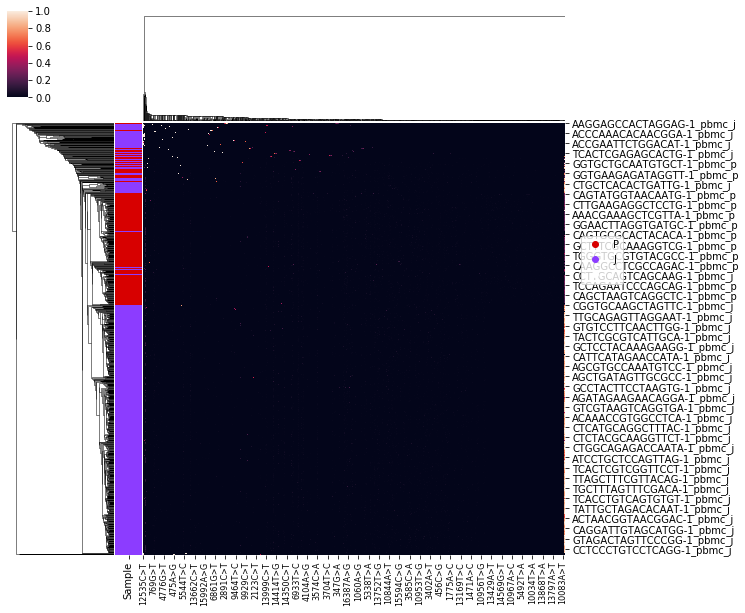

In [21]:
#all_cells_full.columns=list(map(lambda x: x.replace("pbmc_j_", "").replace("pbmc_p_", ""), all_cells_full.columns))

all_cells_full = pd.concat((pbmc_j_AF_by_cell,pbmc_p_AF_by_cell) ,axis=1)
all_cells_full_var_overlap = pd.concat((pbmc_j_AF_by_cell, pbmc_p_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_full_var_overlap.columns.values

cluster_help.plot_cluster(df=all_cells_full.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=True, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)



## Look at base quality

In [38]:
var

,AAACGAAGTGTCCCAG-1_pbmc_j,AAACTGCGTAGCGTTT-1_pbmc_j,AAAGATGAGTCCGGAA-1_pbmc_j,AAAGATGCAGGGCTTC-1_pbmc_j,AAAGATGCATGTGGGA-1_pbmc_j,AAAGGATAGCAGGAGG-1_pbmc_j,AAAGGATGTGAATACA-1_pbmc_j,AAAGGATGTGCTTTGA-1_pbmc_j,AAAGGATTCACCGCGA-1_pbmc_j,AAAGGGCCATTGAACC-1_pbmc_j,...,TTCTGTAAGGCACCTC-1_pbmc_p,TTGAGTGTCGCTACCT-1_pbmc_p,TTGCACCGTCAGGCTC-1_pbmc_p,TTGCCCAGTAAAGGCC-1_pbmc_p,TTGCCCATCGTTCAGA-1_pbmc_p,TTGCTTATCCTAAGTG-1_pbmc_p,TTTACGTCAGGATGTG-1_pbmc_p,TTTACGTCAGTTCGGC-1_pbmc_p,TTTGCGCCAACTCGAT-1_pbmc_p,TTTGGTTAGTAGGAAG-1_pbmc_p
10009G>C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10013C>A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10034T>A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10080A>T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10082A>C,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861T>G,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9868G>A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9881T>C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9899T>C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
variants_meta = pd.DataFrame(list(map(lambda x: [x[:-3], *(x[-3:].split(">"))], all_cells_full.index)), columns=["Position", "Reference", "Alternative"], index=all_cells_full.index)

In [35]:
variants_meta

,Position,Reference,Alternative
10009G>C,10009,G,C
10013C>A,10013,C,A
10034T>A,10034,T,A
10080A>T,10080,A,T
10082A>C,10082,A,C
...,...,...,...
9861T>G,9861,T,G
9868G>A,9868,G,A
9881T>C,9881,T,C
9899T>C,9899,T,C


In [49]:
sparse_pbmc_p

{'A':          Position                Cell  + Count  + BQ  - Count  - BQ
 0               2  AAACGAAAGCTCGTTA-1       84  36.7       87  36.4
 1               5  AAACGAAAGCTCGTTA-1       94  36.9       97  36.1
 2               7  AAACGAAAGCTCGTTA-1      115  36.6      118  35.6
 3              13  AAACGAAAGCTCGTTA-1      142  35.6      146  35.9
 4              16  AAACGAAAGCTCGTTA-1      148  36.5      151  35.8
 ...           ...                 ...      ...   ...      ...   ...
 1963416     16557  TTTGGTTAGTAGGAAG-1      364  36.5      367  36.1
 1963417     16559  TTTGGTTAGTAGGAAG-1      364  36.2      368  36.6
 1963418     16561  TTTGGTTAGTAGGAAG-1      326  36.5      336  35.4
 1963419     16564  TTTGGTTAGTAGGAAG-1      326  36.5      334  35.8
 1963420     16567  TTTGGTTAGTAGGAAG-1      274  36.4      292  36.0
 
 [1963421 rows x 6 columns],
 'C':          Position                Cell  + Count  + BQ  - Count  - BQ
 0               4  AAACGAAAGCTCGTTA-1       93  36.5       97

In [77]:
bq_pos = {}
sparse_pos = {}
for ind, val in variants_meta.groupby("Alternative"):
    curr_bq = sparse_pbmc_p[ind][(sparse_pbmc_p[ind]["Position"].isin(val["Position"]))]
    sparse_pos[ind] = curr_bq
    bq_pos[ind] = ((curr_bq["+ BQ"]) + (curr_bq["+ BQ"]))/2

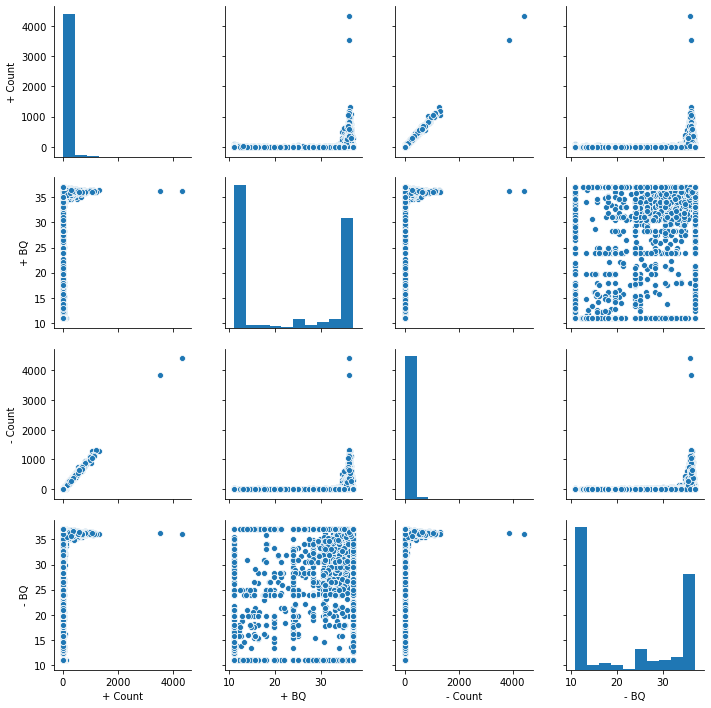

In [62]:
sns.pairplot(curr_bq,vars=["+ Count", "+ BQ", "- Count", "- BQ"])

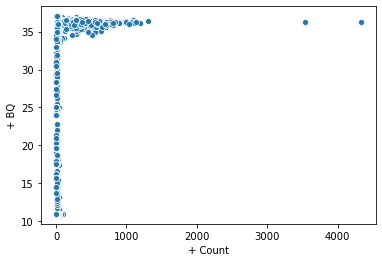

In [64]:
sns.scatterplot(data=curr_bq,x="+ Count", y="+ BQ")

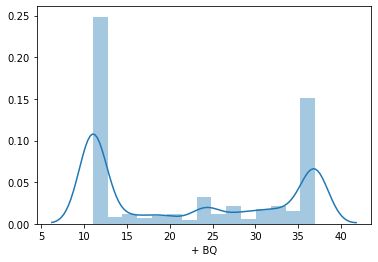

In [57]:
sns.distplot(bq_pos["A"])

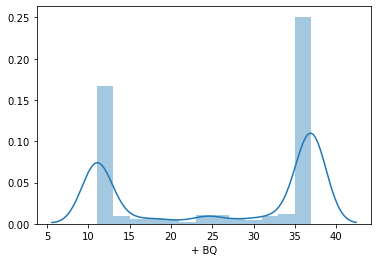

In [58]:
sns.distplot(bq_pos["C"])

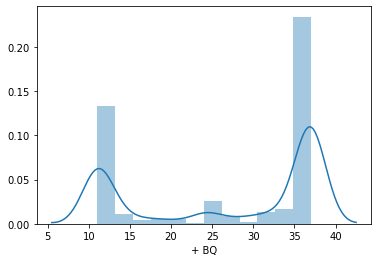

In [59]:
sns.distplot(bq_pos["G"])

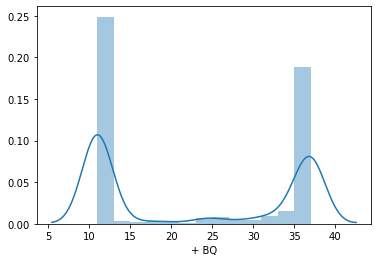

In [60]:
sns.distplot(bq_pos["T"])

In [71]:
bq_pos[ind][bq_pos[ind]<30].index

Int64Index([    150,     799,     870,     886,     905,     994,     995,
               1432,    1608,    1612,
            ...
            1540673, 1540704, 1541097, 1541217, 1541316, 1541322, 1541323,
            1541410, 1541547, 1541796],
           dtype='int64', length=9792)

In [100]:
variants_meta["Position"] = variants_meta["Position"].astype(int)
curr_vars = sparse_pos[ind][sparse_pos[ind]["+ BQ"]< 30]
curr_vars = curr_vars[curr_vars["Position"].isin(variants_meta["Position"])]
curr_vars

,Position,Cell,+ Count,+ BQ,- Count,- BQ
150,601,AAACGAAAGCTCGTTA-1,1,11.0,2,11.0
799,3289,AAACGAAAGCTCGTTA-1,1,11.0,1,11.0
870,3565,AAACGAAAGCTCGTTA-1,2,18.0,1,25.0
886,3625,AAACGAAAGCTCGTTA-1,4,11.0,1,11.0
905,3683,AAACGAAAGCTCGTTA-1,2,11.0,1,11.0
...,...,...,...,...,...,...
1541322,13773,TTTGGTTAGTAGGAAG-1,2,11.0,1,11.0
1541323,13774,TTTGGTTAGTAGGAAG-1,1,11.0,2,18.0
1541410,14081,TTTGGTTAGTAGGAAG-1,1,11.0,4,14.5
1541547,14569,TTTGGTTAGTAGGAAG-1,2,11.0,2,24.0


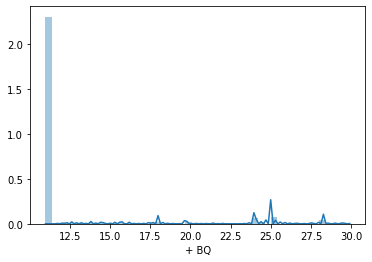

In [101]:
sns.distplot(curr_vars["+ BQ"])

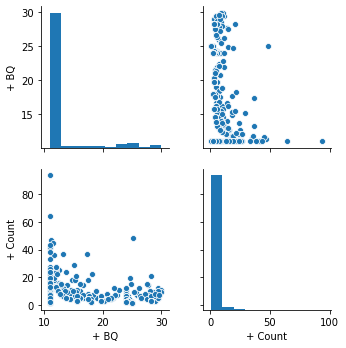

In [102]:
sns.pairplot(data=curr_vars, vars=["+ BQ", "+ Count"])